In [1]:
#import the dependencies 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
#create a set of random latitdue and longitude comninations 
lats = np.random.uniform(low = -90.000, high=90.000, size = 1500)
lngs = np.random.uniform(low = 180.000, high = 180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
import requests 
from config import weather_api_key
from citipy import citipy 

In [4]:
#starting URL for weather Map API Call.
url ="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)
# Import the datetime module from the datetime library.
from datetime import datetime

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a76512f1b7f80ce6ab8b33895d66a0f


In [5]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

609

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | solenzo
Processing Record 2 of Set 1 | olafsvik
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | svetlogorsk
Processing Record 5 of Set 1 | ostrovnoy
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | sungaipenuh
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 12 of Set 1 | ballina
Processing Record 13 of Set 1 | sitka
Processing Record 14 of Set 1 | college
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | provideniya
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | lompoc
Processing Record 22 of Set 1 | korla
City not found. Skipping...
Processing Record 23 of Set 1 | canete
Processing R

Processing Record 39 of Set 4 | komsomolskiy
Processing Record 40 of Set 4 | bonthe
Processing Record 41 of Set 4 | tasiilaq
Processing Record 42 of Set 4 | tiznit
Processing Record 43 of Set 4 | nikolskoye
Processing Record 44 of Set 4 | flin flon
Processing Record 45 of Set 4 | pacific grove
Processing Record 46 of Set 4 | hofn
Processing Record 47 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 48 of Set 4 | askiz
Processing Record 49 of Set 4 | sumbawa
City not found. Skipping...
Processing Record 50 of Set 4 | manokwari
Processing Record 1 of Set 5 | tubruq
City not found. Skipping...
Processing Record 2 of Set 5 | marrakesh
Processing Record 3 of Set 5 | sao filipe
Processing Record 4 of Set 5 | gotsu
Processing Record 5 of Set 5 | al
City not found. Skipping...
Processing Record 6 of Set 5 | kungurtug
Processing Record 7 of Set 5 | waipawa
Processing Record 8 of Set 5 | alofi
Processing Record 9 of Set 5 | kutum
Processing Record 10 of Set 5 | vangaindr

City not found. Skipping...
Processing Record 16 of Set 8 | roma
Processing Record 17 of Set 8 | tual
Processing Record 18 of Set 8 | riedlingen
Processing Record 19 of Set 8 | sur
Processing Record 20 of Set 8 | manaure
Processing Record 21 of Set 8 | padang
Processing Record 22 of Set 8 | asola
Processing Record 23 of Set 8 | mill valley
Processing Record 24 of Set 8 | slave lake
Processing Record 25 of Set 8 | san quintin
Processing Record 26 of Set 8 | nagato
Processing Record 27 of Set 8 | boaco
Processing Record 28 of Set 8 | karaul
City not found. Skipping...
Processing Record 29 of Set 8 | paragominas
Processing Record 30 of Set 8 | haines junction
Processing Record 31 of Set 8 | stantsionno-oyashinskiy
Processing Record 32 of Set 8 | gawler
Processing Record 33 of Set 8 | zhuhai
Processing Record 34 of Set 8 | tuy hoa
Processing Record 35 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 36 of Set 8 | umm lajj
Processing Record 37 of Set 8 | taltal
Processing 

City not found. Skipping...
Processing Record 50 of Set 11 | baraya
Processing Record 1 of Set 12 | banjar
Processing Record 2 of Set 12 | obera
Processing Record 3 of Set 12 | luderitz
Processing Record 4 of Set 12 | biak
Processing Record 5 of Set 12 | calvinia
Processing Record 6 of Set 12 | jhang
Processing Record 7 of Set 12 | jedrzejow
Processing Record 8 of Set 12 | senneterre
Processing Record 9 of Set 12 | sibenik
Processing Record 10 of Set 12 | gopalpur
Processing Record 11 of Set 12 | matay
Processing Record 12 of Set 12 | mizdah
Processing Record 13 of Set 12 | arona
Processing Record 14 of Set 12 | stokmarknes
Processing Record 15 of Set 12 | verkhoyansk
Processing Record 16 of Set 12 | kosikha
Processing Record 17 of Set 12 | allanridge
Processing Record 18 of Set 12 | kahului
Processing Record 19 of Set 12 | dmitriyevka
Processing Record 20 of Set 12 | srandakan
Processing Record 21 of Set 12 | camana
Processing Record 22 of Set 12 | tumannyy
City not found. Skipping...

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Solenzo,12.1833,-4.0833,67.60,23,67,10.20,BF,2021-01-17 03:31:45
1,Olafsvik,64.8945,-23.7142,36.34,93,100,15.93,IS,2021-01-17 03:31:46
2,Barrow,71.2906,-156.7887,-0.40,78,90,19.57,US,2021-01-17 03:30:44
3,Svetlogorsk,52.6333,29.7333,0.77,92,100,5.12,BY,2021-01-17 03:31:46
4,Ostrovnoy,68.0531,39.5131,28.22,98,100,5.59,RU,2021-01-17 03:31:47
5,Busselton,-33.6500,115.3333,84.00,34,0,8.01,AU,2021-01-17 03:31:47
6,Ushuaia,-54.8000,-68.3000,50.00,76,40,17.27,AR,2021-01-17 03:31:34
7,Sungaipenuh,-2.0833,101.3833,81.39,46,99,3.58,ID,2021-01-17 03:31:47
8,New Norfolk,-42.7826,147.0587,66.00,58,99,8.99,AU,2021-01-17 03:31:47
9,Punta Arenas,-53.1500,-70.9167,50.00,76,0,14.97,CL,2021-01-17 03:31:48


In [20]:
# Create the output file (CSV).
output_data_file = "Weather_Database/WeatherPy_database.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
#extract relevant fields from the DataFrame for plotting 
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [22]:
#import the time module 
import time
#get today"s date in seconds 
today = time.strftime("%x")
today

'01/16/21'

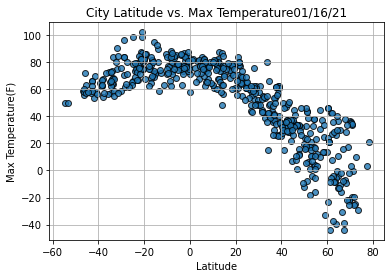

In [23]:
#import the moudle 
import time 

#building the scatter plot for latitiude vs max temperature 
plt.scatter(lats, max_temps, edgecolor = "black", linewidths = 1, marker ="o",
           alpha = 0.8, label = "Cities")

#Incorporate the other graph properites 
plt.title(f"City Latitude vs. Max Temperature" + time. strftime("%x"))
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure 
plt.savefig("weather_data/Fig2.png")

#show plt 
plt.show()

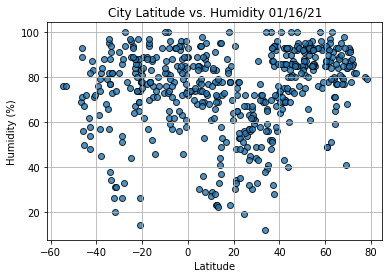

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

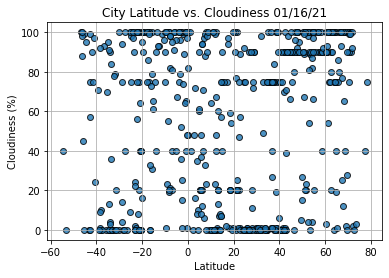

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

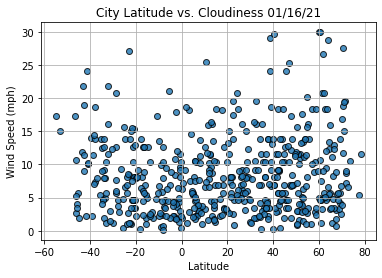

In [26]:
# Build the scatter plots for latitude vs. wind_speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

In [34]:
#import Linregress 
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label,text_coordinates):
    
    #Run regression on Hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept 
    
    #Get the equation of the line
    line_eq = "y =" +str(round(slope,2)) + "x +" +str(round(intercept,2))
    #create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    #Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color ="red")
    plt.xlabel("Latitude")
    plt.ylabel("y_label")
    plt.show()   

In [35]:
index13 =city_data_df.loc[13]
index13

City                       Hobart
Lat                      -42.8794
Lng                       147.329
Max Temp                       66
Humidity                       48
Cloudiness                     75
Wind Speed                  21.85
Country                        AU
Date          2021-01-17 03:31:49
Name: 13, dtype: object

In [36]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4       True
       ...  
521     True
522     True
523    False
524     True
525     True
Name: Lat, Length: 526, dtype: bool

In [37]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Solenzo,12.1833,-4.0833,67.60,23,67,10.20,BF,2021-01-17 03:31:45
1,Olafsvik,64.8945,-23.7142,36.34,93,100,15.93,IS,2021-01-17 03:31:46
2,Barrow,71.2906,-156.7887,-0.40,78,90,19.57,US,2021-01-17 03:30:44
3,Svetlogorsk,52.6333,29.7333,0.77,92,100,5.12,BY,2021-01-17 03:31:46
4,Ostrovnoy,68.0531,39.5131,28.22,98,100,5.59,RU,2021-01-17 03:31:47
...,...,...,...,...,...,...,...,...,...
518,Labuan,5.2767,115.2417,77.00,94,20,3.44,MY,2021-01-17 03:34:26
521,North Bend,43.4065,-124.2243,51.01,93,90,4.61,US,2021-01-17 03:34:27
522,Svetlaya,46.5389,138.3297,10.63,73,80,3.47,RU,2021-01-17 03:34:27
524,Buchanan,5.8808,-10.0467,75.20,94,20,5.12,LR,2021-01-17 03:34:28


In [38]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Solenzo,12.1833,-4.0833,67.60,23,67,10.20,BF,2021-01-17 03:31:45
1,Olafsvik,64.8945,-23.7142,36.34,93,100,15.93,IS,2021-01-17 03:31:46
2,Barrow,71.2906,-156.7887,-0.40,78,90,19.57,US,2021-01-17 03:30:44
3,Svetlogorsk,52.6333,29.7333,0.77,92,100,5.12,BY,2021-01-17 03:31:46
4,Ostrovnoy,68.0531,39.5131,28.22,98,100,5.59,RU,2021-01-17 03:31:47


In [39]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

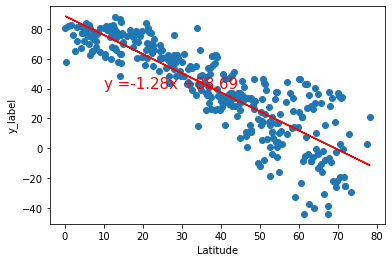

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

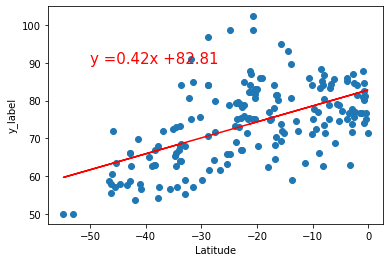

In [41]:
# Linear regression on the Southern Hemispher
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
#call the function 
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

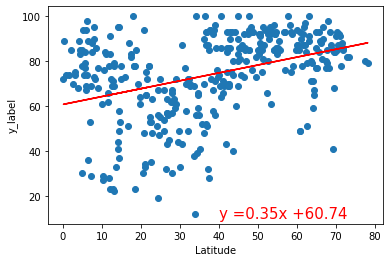

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

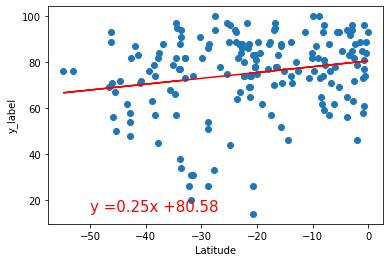

In [44]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere\
                        for %Humidity', '%Humidity',(-50,15))

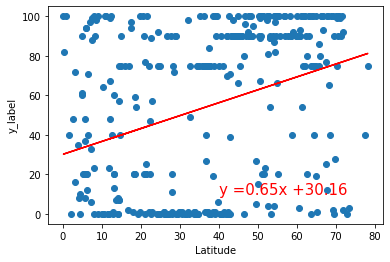

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

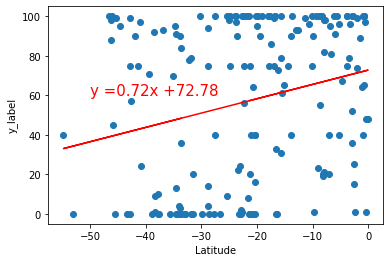

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

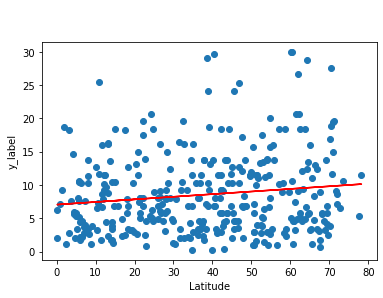

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

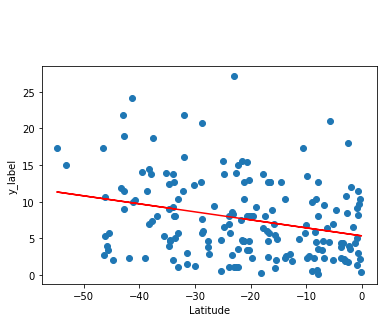

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))
